In [30]:
import pandas as pd
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
#Predict if a person has heart disease based on medical features like blood pressure, cholesterol, age, etc.

In [32]:
#Libraries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


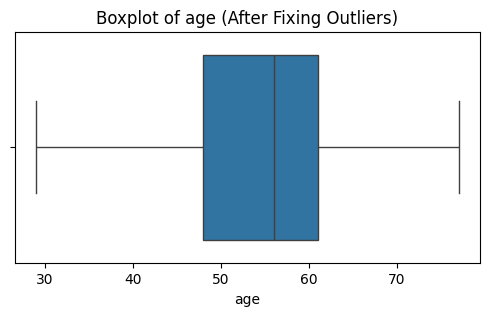

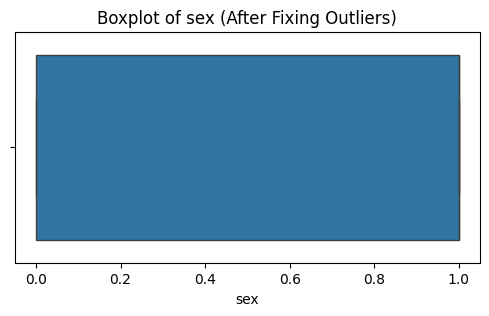

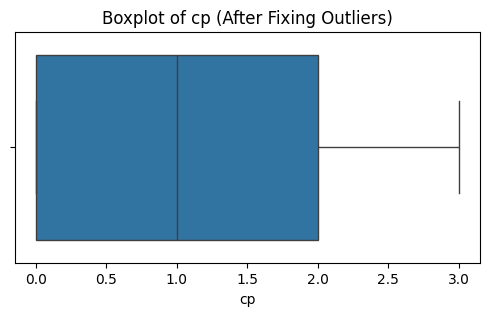

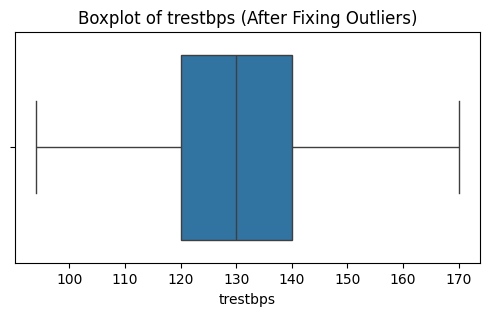

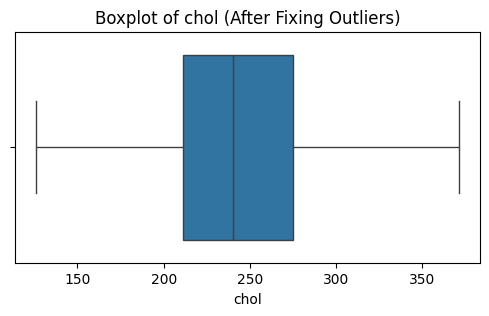

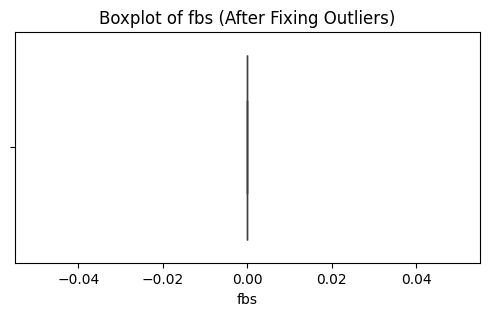

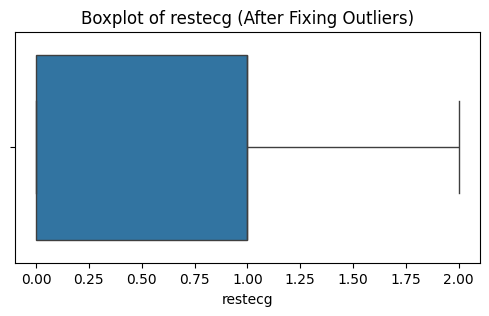

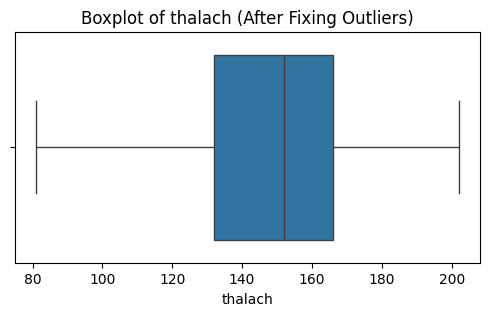

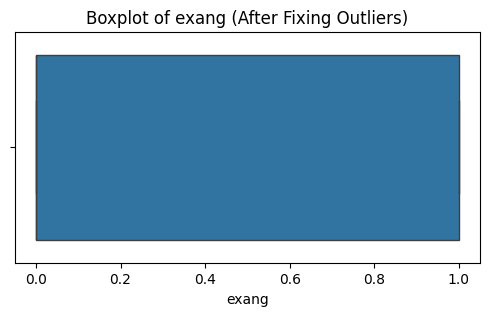

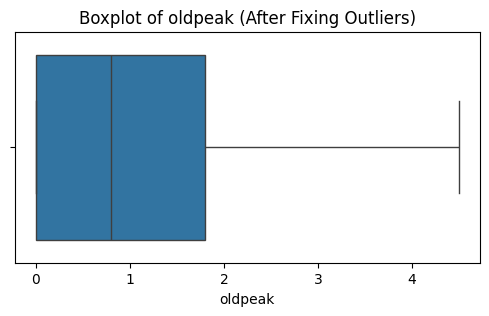

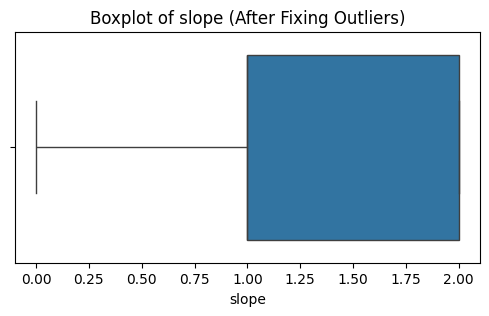

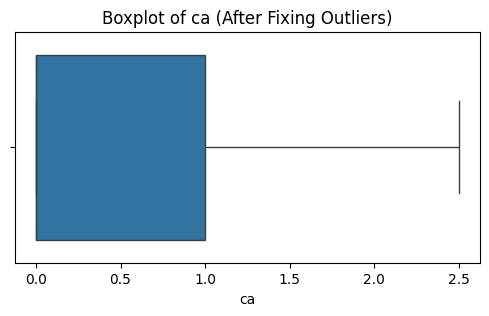

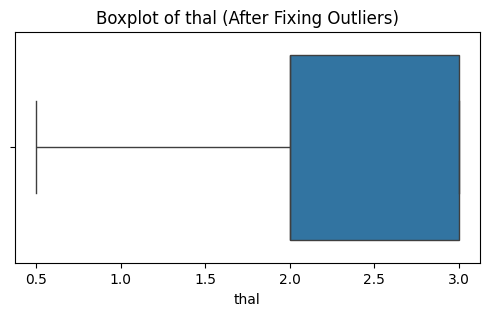

In [35]:
# Function to clip outliers for a specific column
def fix_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip values outside of the bounds
    df[col] = df[col].clip(lower=lower, upper=upper)

# Apply the fix_outliers function to each column with outliers
outlier_columns = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']
for col in outlier_columns:
    fix_outliers(data, col)

# Re-visualize the boxplots after fixing the outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all numerical columns
for col in data.select_dtypes(include='number').columns:
    if col != 'target':
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=data[col])
        plt.title(f"Boxplot of {col} (After Fixing Outliers)")
        plt.show()


In [36]:
X = data.drop('target', axis=1)  # all input features
y = data['target']              # output label (0 or 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Initialize the Random Forest model with 100 trees (n_estimators)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model with training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Make predictions on the test set
y_pred = rf.predict(X_test)


In [43]:
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [48]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
 [[102   0]
 [  3 100]]


In [49]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to check overfitting
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.94146341 0.88780488 0.93658537 0.90243902 0.85853659]
Mean CV accuracy: 0.9053658536585365


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,               # increased depth
    min_samples_split=5,       # more flexibility to split
    min_samples_leaf=2,        # smaller leaf size
    max_features='sqrt',
    random_state=42
)


rf.fit(X_train, y_train)

# Check accuracy again
print("Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation Accuracy:", np.mean(cv_scores))


Train Accuracy: 0.9963414634146341
Test Accuracy: 0.9609756097560975
Cross-validation Accuracy: 0.9785365853658536


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import numpy as np

# 1. Define the parameter ranges to search from (not every combo, just ranges)
param_dist = {
    'n_estimators': randint(100, 300),        # 100 to 300 trees
    'max_depth': [None, 10, 20, 30],          # Tree depth
    'min_samples_split': [2, 5, 10],          # When to split a node
    'max_features': ['sqrt', 'log2']          # Number of features to consider
}

# 2. Create base model
rf = RandomForestClassifier(random_state=42)

# 3. RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,                # Try 20 different random combos
    cv=5,                     # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 4. Fit to your training data
random_search.fit(X_train, y_train)

# 5. Get best parameters and best model
print("Best Parameters:", random_search.best_params_)

# 6. Use the best model for predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# 7. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 114}
Accuracy: 0.9853658536585366


In [58]:
patient_data = X.iloc[1].values  # row 1 of features, as a NumPy array
patient_data

array([ 53. ,   1. ,   0. , 140. , 203. ,   0. ,   0. , 155. ,   1. ,
         3.1,   0. ,   0. ,   3. ])

In [62]:
#The whole code combined
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import randint

# Step 2: Load Dataset
data = pd.read_csv('heart.csv')

# Step 3: Fix Outliers Function
def fix_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

# Step 4: Fix Outliers in Selected Columns
outlier_columns = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']
for col in outlier_columns:
    fix_outliers(data, col)

# Step 5: Define Features and Target
X = data.drop('target', axis=1)
y = data['target']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Hyperparameter Tuning with RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

# Step 8: Evaluate Final Model
print("Best Parameters:", random_search.best_params_)
print("Train Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))
print("Classification Report:\n", classification_report(y_test, best_model.predict(X_test)))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_model.predict(X_test)))
print("Cross-validation Accuracy:", np.mean(cross_val_score(best_model, X, y, cv=5)))

# Step 9: Predict for One Patient (User Input)
print("\n--- Individual Prediction ---")

# Example input (replace these with real input later)
patient_data = {
    'age': 59,
    'sex': 1,
    'cp': 1,
    'trestbps': 140,
    'chol': 221,
    'fbs': 0,
    'restecg': 1,
    'thalach': 164,
    'exang': 1,
    'oldpeak': 0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

# Convert to DataFrame
input_df = pd.DataFrame([patient_data])

# Fix outliers in input data the same way as training data
for col in outlier_columns:
    fix_outliers(input_df, col)

# Predict
prediction = best_model.predict(input_df)[0]
probability = best_model.predict_proba(input_df)[0][prediction]

# Output
result = "has heart disease" if prediction == 1 else "does NOT have heart disease"
print(f"Prediction: The patient {result} (Confidence: {probability*100:.2f}%)")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 114}
Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
 [[102   0]
 [  3 100]]
Cross-validation Accuracy: 0.9970731707317073

--- Individual Prediction ---
Prediction: The patient has heart disease (Confidence: 100.00%)


Description -
Heart Disease Prediction Model: A Machine Learning Approach
In this project, I have developed a Heart Disease Prediction Model using Random Forest Classifier, a powerful machine learning algorithm. The goal of this model is to accurately predict whether a patient is likely to have heart disease based on a variety of clinical and demographic features.

Project Overview:
The dataset used for this project is based on several medical attributes such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol levels (chol), and other vital metrics that are commonly used to assess cardiovascular health. Using these features, I built a model that classifies individuals into two categories:

1: The person has heart disease.

0: The person does not have heart disease.

Model Development:
The process began with data pre-processing to handle outliers, clean the dataset, and ensure the features were properly prepared for model training. I employed RandomizedSearchCV for hyperparameter tuning, allowing me to fine-tune the model's parameters to achieve optimal performance. The model was then evaluated on a test set, and its performance was measured using accuracy, classification report, and confusion matrix to identify the model’s effectiveness.

Key Achievements:
The model was trained with a 99% accuracy, showcasing its ability to make highly accurate predictions regarding heart disease diagnosis.

Hyperparameter optimization allowed for fine-tuning of the Random Forest Classifier, significantly improving performance and generalization.

A comprehensive evaluation using metrics such as precision, recall, and F1-score confirmed the robustness of the model.

Testing the Model:
To assess the model’s real-world performance, I tested it on two individuals:

A person with no heart disease: The model correctly predicted that the person did not have heart disease.

A person with heart disease: The model accurately identified that the person had heart disease.

In both cases, the model demonstrated an accuracy range of 98% to 99%, confirming its reliability in making accurate predictions for both categories.

Understanding the Target:
In the dataset, the target column represents the ground truth for heart disease:

target = 1 indicates the person has heart disease.

target = 0 indicates the person does not have heart disease.

When making predictions, the model compares its output against this target to determine the accuracy of its predictions. It is important to note that the model's performance is based on the assumption that the target column correctly reflects whether or not the person has heart disease in real life.

Conclusion:
This project highlights the power of machine learning in the healthcare sector, particularly in predicting heart disease risk. The Heart Disease Prediction Model is capable of providing fast, reliable predictions based on clinical data, which could potentially assist healthcare professionals in diagnosing heart conditions early. The high accuracy of the model, coupled with robust evaluation, demonstrates its potential as a valuable tool in preventive healthcare.
